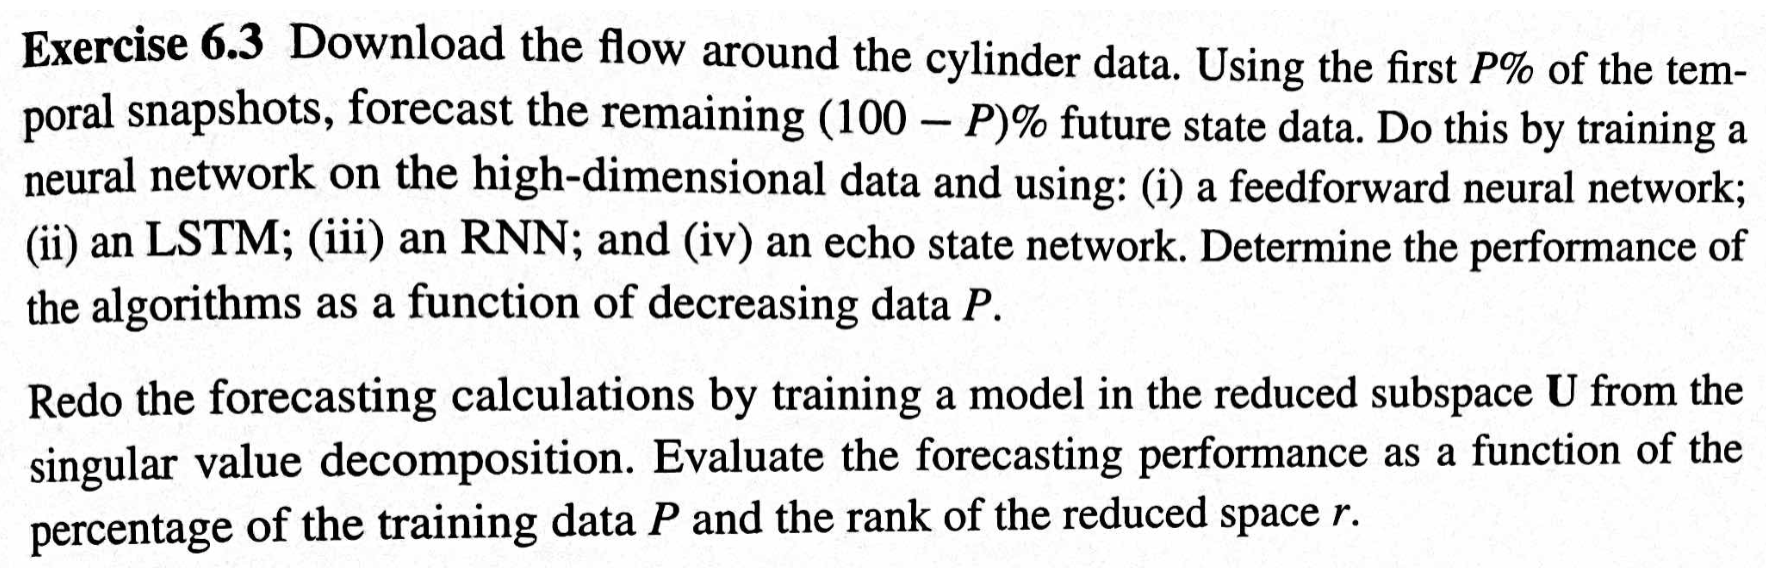

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
#plt.rcParams['figure.figsize'] = [8, 8]

In [4]:
vortall_mat = io.loadmat(os.path.join('.','DATA','VORTALL.mat'))
X = vortall_mat['VORTALL']
# VORTALL contains flow fields reshaped into column vectors

In [5]:
def plotFlow(X):    
    ## Plot Mode 2
    vortmin = -5
    vortmax = 5
    V2 = np.copy(np.real(np.reshape(X,(449,199))))
    V2 = V2.T

    # normalize values... not symmetric
    minval = np.min(V2)
    maxval = np.max(V2)

    if np.abs(minval) < 5 and np.abs(maxval) < 5:
        if np.abs(minval) > np.abs(maxval):
            vortmax = maxval
            vortmin = -maxval
        else:
            vortmin = minval
            vortmax = -minval

    V2[V2 > vortmax] = vortmax
    V2[V2 < vortmin] = vortmin

    plt.imshow(V2,cmap='jet',vmin=vortmin,vmax=vortmax)

    cvals = np.array([-4,-2,-1,-0.5,-0.25,-0.155])
    plt.contour(V2,cvals*vortmax/5,colors='k',linestyles='dashed',linewidths=1)
    plt.contour(V2,np.flip(-cvals)*vortmax/5,colors='k',linestyles='solid',linewidths=0.4)

    plt.scatter(49,99,5000,color='k') # draw cylinder

    #plt.show()

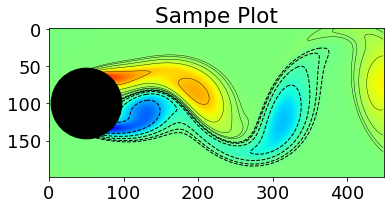

In [6]:
plotFlow(X[:,0])
plt.title("Sampe Plot")
plt.show()

# (i) Feed-forward neural network

In [7]:
#Use tensorflow
#!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


In [12]:
P = 0.8 #split into train-test data
Train = X[:, :int(X.shape[1]*P)]
Test = X[:, int(X.shape[1]*P)-1:]

In [13]:
Train.shape

(89351, 120)

In [14]:
Test.shape

(89351, 32)